In [2]:
#!pip install squarify

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import squarify
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/zomato.csv', encoding='latin-1', engine='python', on_bad_lines='skip')

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51118 entries, 0 to 51117
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51118 non-null  object
 1   address                      51118 non-null  object
 2   name                         51118 non-null  object
 3   online_order                 51118 non-null  object
 4   book_table                   51118 non-null  object
 5   rate                         43343 non-null  object
 6   votes                        51118 non-null  int64 
 7   phone                        49915 non-null  object
 8   location                     51097 non-null  object
 9   rest_type                    50894 non-null  object
 10  dish_liked                   23044 non-null  object
 11  cuisines                     51073 non-null  object
 12  approx_cost(for two people)  50774 non-null  object
 13  reviews_list                 51

In [8]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1203
location,21
rest_type,224


In [9]:
df['listed_in(city)'].describe()

,listed_in(city)
count,51118
unique,30
top,BTM
freq,3259


1 name

Description: Name of the restaurant.

Data Type: Categorical (Text)

Examples: Empire Restaurant, Domino’s Pizza

Usage: Helps identify popular restaurants and chains; used to find most famous restaurant brands.

2 online_order

Description: Indicates whether the restaurant accepts online food orders.

Data Type: Categorical (Yes/No)

Possible Values: Yes, No

Usage: Used to analyze online delivery trends and compare ratings of delivery vs non-delivery restaurants.

3 book_table

Description: Shows whether table booking facility is available.

Data Type: Categorical (Yes/No)

Possible Values: Yes, No

Usage: Helps analyze customer preference and relationship between table booking and restaurant ratings.

4 rate

Description: Average customer rating of the restaurant (out of 5).

Data Type: Numerical (Float) after cleaning

Examples: 3.8, 4.2

Usage: Primary performance indicator; used to compare restaurant quality across locations, types, and services.

5 votes

Description: Total number of customer votes received.

Data Type: Numerical (Integer)

Usage: Indicates popularity and customer engagement; higher votes usually mean higher trust.

6 location

Description: Area in Bengaluru where the restaurant is located.

Data Type: Categorical

Examples: BTM, Whitefield, Indiranagar

Usage: Used to find best locations, restaurant density, and location-based rating analysis.

7 rest_type

Description: Type or style of restaurant.

Data Type: Categorical

Examples: Casual Dining, Quick Bites, Café

Usage: Helps understand customer preference and compare ratings by restaurant type.

8 dish_liked

Description: Most popular dishes liked by customers.

Data Type: Text

Usage: Useful for menu analysis but often contains many missing values; usually dropped.

9 cuisines

Description: Types of cuisines served by the restaurant.

Data Type: Categorical / Text

Examples: North Indian, Chinese, Italian

Usage: Helps analyze food preferences and cuisine popularity.

10 approx_cost(for two people)

Description: Approximate cost for two people.

Data Type: Numerical (Integer after cleaning)

Usage: Used for affordability analysis and relation between cost and rating.

11 reviews_list

Description: Customer reviews in text format.

Data Type: Text

Usage: Used in NLP/sentiment analysis; usually removed for basic EDA.

12 menu_item

Description: List of menu items.

Data Type: Text

Usage: Not used in EDA due to high sparsity.

13 listed_in(type)

Description: Type of service provided.

Data Type: Categorical

Examples: Delivery, Dine-out, Desserts

Usage: Used to compare service types and ratings.

14 listed_in(city)

Description: City where the restaurant is listed.

Data Type: Categorical

Usage: Mostly Bengaluru; low analytical value.

**Dropping columns - url, address, phone, menu_item, reviews_list, dish_liked (Irrelevant for numerical analysis)**

In [10]:
df.drop(columns=['url', 'address', 'phone', 'menu_item', 'reviews_list', 'dish_liked'], inplace = True)

In [11]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


****

**Deleting duplicate rows.**

In [12]:
df.duplicated().sum()

np.int64(106)

In [13]:
df.drop_duplicates()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51113,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51114,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51115,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51116,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


The rating column contained non-numeric entries such as “NEW” and “-”. These entries were removed, and ratings were converted from string format (e.g., 4.1/5) to numerical float values for analysis.

In [14]:
df = df[~df['rate'].isin(['NEW', '-'])]
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = df['rate'].astype(float)

The cost column was cleaned by removing commas and converting it into a numerical format to analyze pricing patterns across restaurants.

In [15]:
df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)
df['cost_for_two'] = df['cost_for_two'].astype(str).str.replace(',', '').replace('None', np.nan)
df['cost_for_two'] = df['cost_for_two'].astype(float)

In [16]:
df['online_order'] = df['online_order'].astype('category')
df['book_table'] = df['book_table'].astype('category')
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48843 entries, 0 to 51117
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             48843 non-null  object  
 1   online_order     48843 non-null  category
 2   book_table       48843 non-null  category
 3   rate             41068 non-null  float64 
 4   votes            48843 non-null  int64   
 5   location         48822 non-null  object  
 6   rest_type        48621 non-null  object  
 7   cuisines         48798 non-null  object  
 8   cost_for_two     48504 non-null  float64 
 9   listed_in(type)  48843 non-null  object  
 10  listed_in(city)  48843 non-null  object  
dtypes: category(2), float64(2), int64(1), object(6)
memory usage: 3.8+ MB


Individual columns were cleaned by removing invalid values, converting text-based numeric fields into proper numerical formats, and encoding categorical features for effective analysis.

In [18]:
df['rest_type'] = df['rest_type'].str.split(',').str[0]

In [19]:
df['rest_type'] = df['rest_type'].replace({
    'Quick Bites': 'Quick Service',
    'Takeaway, Delivery': 'Quick Service',
    'Bakery': 'Desserts',
    'Dessert Parlor': 'Desserts'
})

Restaurant types were grouped into broader categories to reduce sparsity and improve interpretability.

Normalize or Bucket Ratings

In [20]:
df['rating_normalized'] = (df['rate'] - df['rate'].min()) / (df['rate'].max() - df['rate'].min())
def rating_category(r):
    if r < 3.0:
        return 'Poor'
    elif r < 4.0:
        return 'Average'
    else:
        return 'Excellent'

df['rating_category'] = df['rate'].apply(rating_category)


| Rating    | Category  |
| --------- | --------- |
| < 3.0     | Poor      |
| 3.0 - 3.9 | Average   |
| ≥ 4.0     | Excellent |


In [21]:
def rating_category(r):
    if r < 3.0:
        return 'Poor'
    elif r < 4.0:
        return 'Average'
    else:
        return 'Excellent'

df['rating_category'] = df['rate'].apply(rating_category)


In [22]:
categorical_cols = [
    'online_order',
    'book_table',
    'location',
    'rest_type',
    'listed_in(type)'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48843 entries, 0 to 51117
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               48843 non-null  object  
 1   online_order       48843 non-null  category
 2   book_table         48843 non-null  category
 3   rate               41068 non-null  float64 
 4   votes              48843 non-null  int64   
 5   location           48822 non-null  category
 6   rest_type          48621 non-null  category
 7   cuisines           48798 non-null  object  
 8   cost_for_two       48504 non-null  float64 
 9   listed_in(type)    48843 non-null  category
 10  listed_in(city)    48843 non-null  object  
 11  rating_normalized  41068 non-null  float64 
 12  rating_category    48843 non-null  object  
dtypes: category(5), float64(3), int64(1), object(4)
memory usage: 3.6+ MB


**Data Visualization**

In [24]:
from matplotlib import font_manager, rcParams

# ----------------------------
# Zomato Brand Colors
# ----------------------------
CRANBERRY = "#E23744"
TYROLEAN = "#F4F4F2"
PEPPERCORN = "#2D2D2D"
FETA = "#FFFFFF"

# ----------------------------
# Font setup (Metropolis → Open Sans → Default)
# ----------------------------
available_fonts = [f.name for f in font_manager.fontManager.ttflist]

if "Metropolis" in available_fonts:
    BRAND_FONT = "Metropolis"
elif "Open Sans" in available_fonts:
    BRAND_FONT = "Open Sans"
else:
    BRAND_FONT = "sans-serif"

# ----------------------------
# Seaborn + Matplotlib styling
# ----------------------------
sns.set_theme(style="whitegrid", context="talk")

rcParams["font.family"] = BRAND_FONT
rcParams["figure.facecolor"] = FETA
rcParams["axes.facecolor"] = TYROLEAN
rcParams["axes.edgecolor"] = PEPPERCORN
rcParams["axes.labelcolor"] = PEPPERCORN
rcParams["xtick.color"] = PEPPERCORN
rcParams["ytick.color"] = PEPPERCORN
rcParams["text.color"] = PEPPERCORN
rcParams["axes.titleweight"] = "bold"
rcParams["grid.color"] = "#DDDDDD"
plt.rcParams["savefig.facecolor"] = TYROLEAN


Most famous restaurant chains in Bengaluru

---



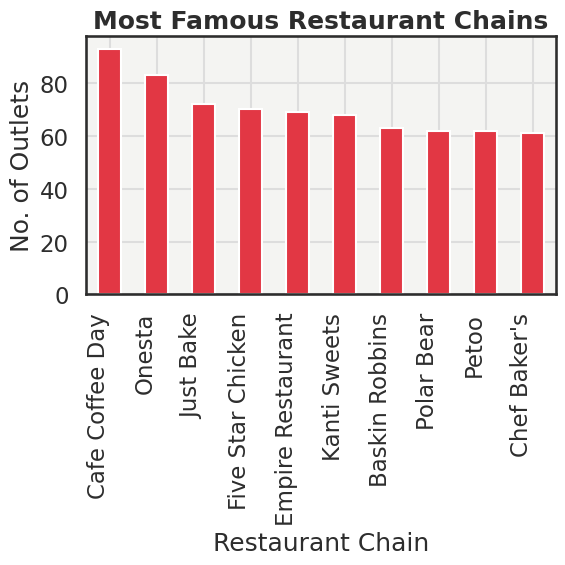

In [25]:
plt.figure(figsize=(6,6))

top_chains = df['name'].value_counts().head(10)

ax = top_chains.plot(
    kind='bar',
    color=CRANBERRY
)

ax.set_title("Most Famous Restaurant Chains")
ax.set_xlabel("Restaurant Chain")
ax.set_ylabel("No. of Outlets")

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


**Market Overview and Portfolio Mix**

a. SERVICE AVAILABILITY

>



i) Online Order Availability

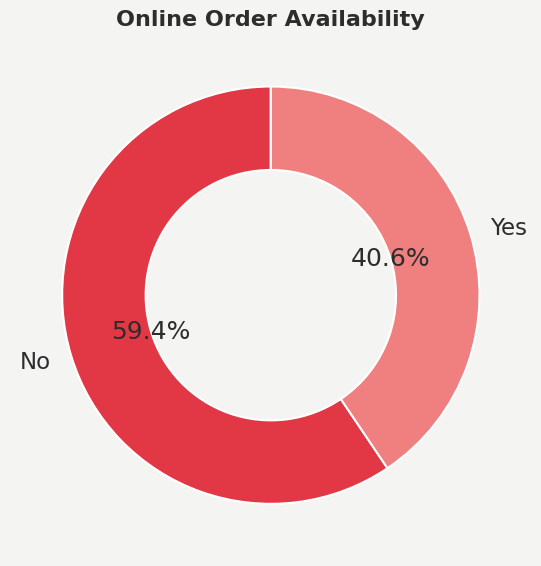

In [26]:
online_counts = df['online_order'].value_counts()

plt.figure(figsize=(6,6), facecolor=TYROLEAN)

plt.pie(
    online_counts,
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    startangle=90,
    colors=[CRANBERRY, "#F08080"],
    wedgeprops=dict(width=0.4, edgecolor=FETA),
    textprops={'color': PEPPERCORN}
)

plt.title("Online Order Availability", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


ii) Table Booking Availability

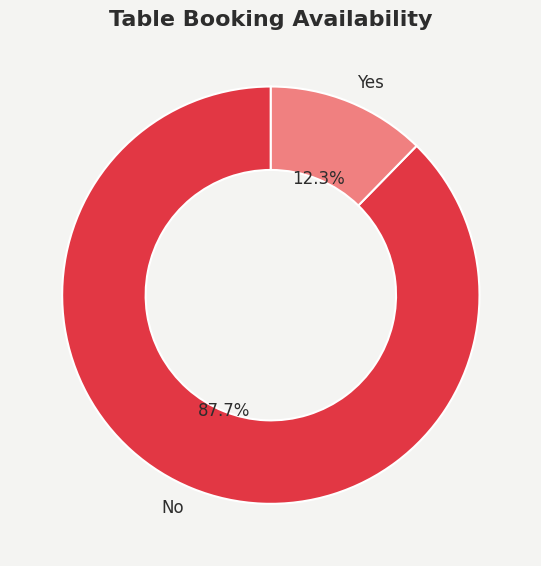

In [27]:
book_counts = df['book_table'].value_counts()

plt.figure(figsize=(6,6), facecolor=TYROLEAN)

plt.pie(
    book_counts,
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    startangle=90,
    colors=[CRANBERRY, "#F08080"],
    wedgeprops=dict(width=0.4, edgecolor=FETA),
    textprops={'color': PEPPERCORN, 'fontsize': 12}
)

plt.title(
    "Table Booking Availability",
    fontsize=16,
    fontweight='bold',
    color=PEPPERCORN
)

plt.tight_layout()
plt.show()


A significantly larger share of restaurants offer online ordering compared to table booking, indicating strong digital adoption but relatively lower dine-in reservation readiness.

b. TOP 10 RESTAURANTS

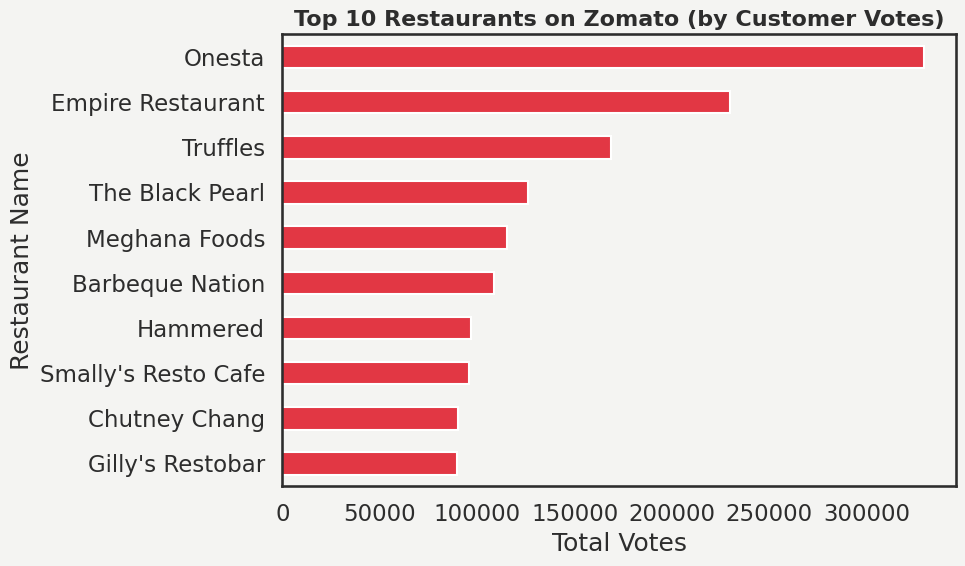

In [28]:
# Select top 10 restaurants by number of votes
top_restaurants = (
    df.groupby('name')['votes']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6), facecolor=TYROLEAN)

top_restaurants.sort_values().plot(
    kind='barh',
    color=CRANBERRY,
    edgecolor=FETA
)

plt.title(
    "Top 10 Restaurants on Zomato (by Customer Votes)",
    fontsize=16,
    fontweight='bold',
    color=PEPPERCORN
)

plt.xlabel("Total Votes", color=PEPPERCORN)
plt.ylabel("Restaurant Name", color=PEPPERCORN)

plt.xticks(color=PEPPERCORN)
plt.yticks(color=PEPPERCORN)

plt.grid(False)
plt.tight_layout()
plt.show()

**Dominant Market Leader**: The outlier for this category is Onesta, which leads all others far ahead with a considerably larger number of votes (exceeding 300,000) than others. This is indicative of a substantially large number of consumer bases or a highly successful business model.

**“Big Three” Gap**: This is an evident chasm in popularity. Truffles and Empire Restaurant constitute the second level after Onesta. The difference between 1st and 2nd positions differs in size compared to the difference between 4th and 10th positions.

**Competitive Mid-Tier:** From The Black Pearl to Chutney Chang, restaurants display a more or less incremental variation when it comes to vote differences. This points to a rather competitive sector when it comes to traditional restaurants and buffets such as Barbeque Nation and Meghana Foods.

**Brand Type Distribution**: The list is largely comprised of casual dining chains and so-called "restobars," indicating that high engagement on Zomato is a function of multi-brand and social dining establishments.

**Geographical & Customer Insights**

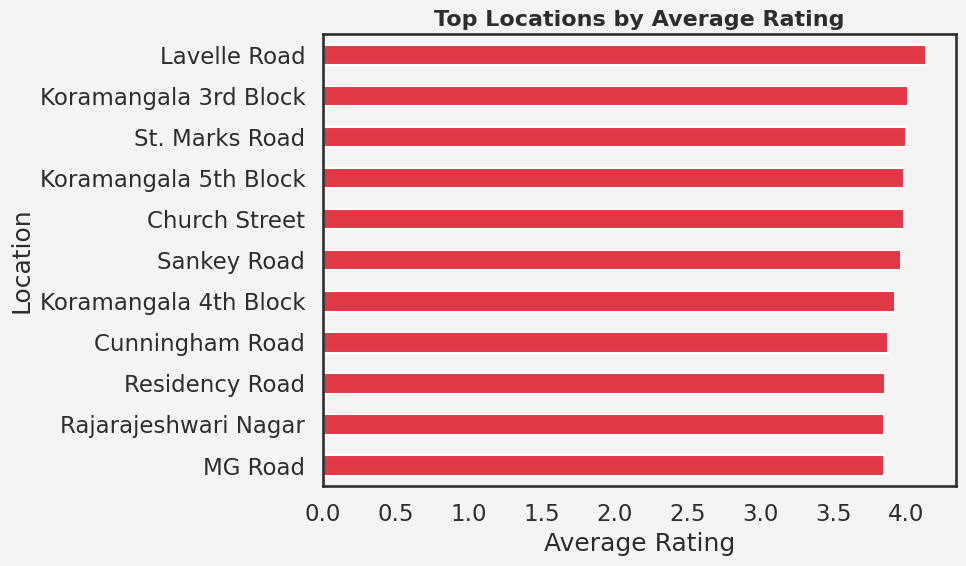

In [29]:
plt.figure(figsize=(10,6), facecolor=TYROLEAN)

location_rating = df.groupby('location', observed=False)['rate'].mean().sort_values(ascending=False).head(11)
location_rating.sort_values().plot(
    kind='barh',
    color=CRANBERRY,
    edgecolor=FETA
)

plt.title(
    "Top Locations by Average Rating",
    fontsize=16,
    fontweight='bold',
    color=PEPPERCORN
)
plt.xlabel("Average Rating", color=PEPPERCORN)
plt.ylabel("Location", color=PEPPERCORN)
plt.grid(False)
plt.tight_layout()
plt.show()

This graph evaluates premium clusters and geographic excellence.

**The Premium Hub:** Lavelle Road is the only location in the market to surpass the 4.0 average rating barrier. This suggests a high concentration of upscale restaurants or establishments that provide reliable service.

**Koramangala's Dominance:** Take note of Koramangala's three appearances in the top list (3rd, 4th, and 5th Blocks). This shows that Koramangala is the most dependable "foodie" hub for quality in several different zones.

**High Consistency, Low Variance:** There is only a slight difference (roughly 4.1 vs. 3.8) between the first and tenth locations. This implies that the best restaurants are fiercely competitive and uphold a very similar level of quality.

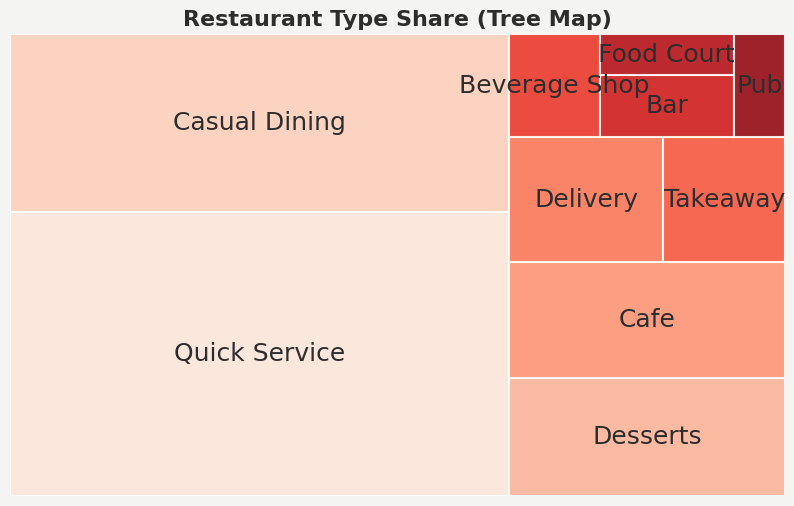

In [30]:
rest_type_counts = df['rest_type'].value_counts().head(10)

plt.figure(figsize=(10,6), facecolor=TYROLEAN)
squarify.plot(
    sizes=rest_type_counts.values,
    label=rest_type_counts.index,
    color=sns.color_palette("Reds", len(rest_type_counts)),
    alpha=0.9
)

plt.title("Restaurant Type Share (Tree Map)", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()


According to the Tree Map analysis, the market is clearly bottom-heavy, with Quick Service and Casual Dining serving as the main pillars and holding more than half of the market share. Specialized sectors like pubs, bars, and food courts have much smaller footprints than high-volume formats like delivery, takeout, and cafes, which maintain a strong secondary presence to support the convenience economy. According to this distribution, the physical landscape is dominated by high-friction, mass-appeal models intended for speed and regular dining, even though premium or social hubs like Lavelle Road may lead in quality ratings.*For a new entrant, the Cafe and Dessert segments appear to be the "sweet spot"—large enough to have a proven market but less saturated than the massive Quick Service and Casual Dining blocks.*

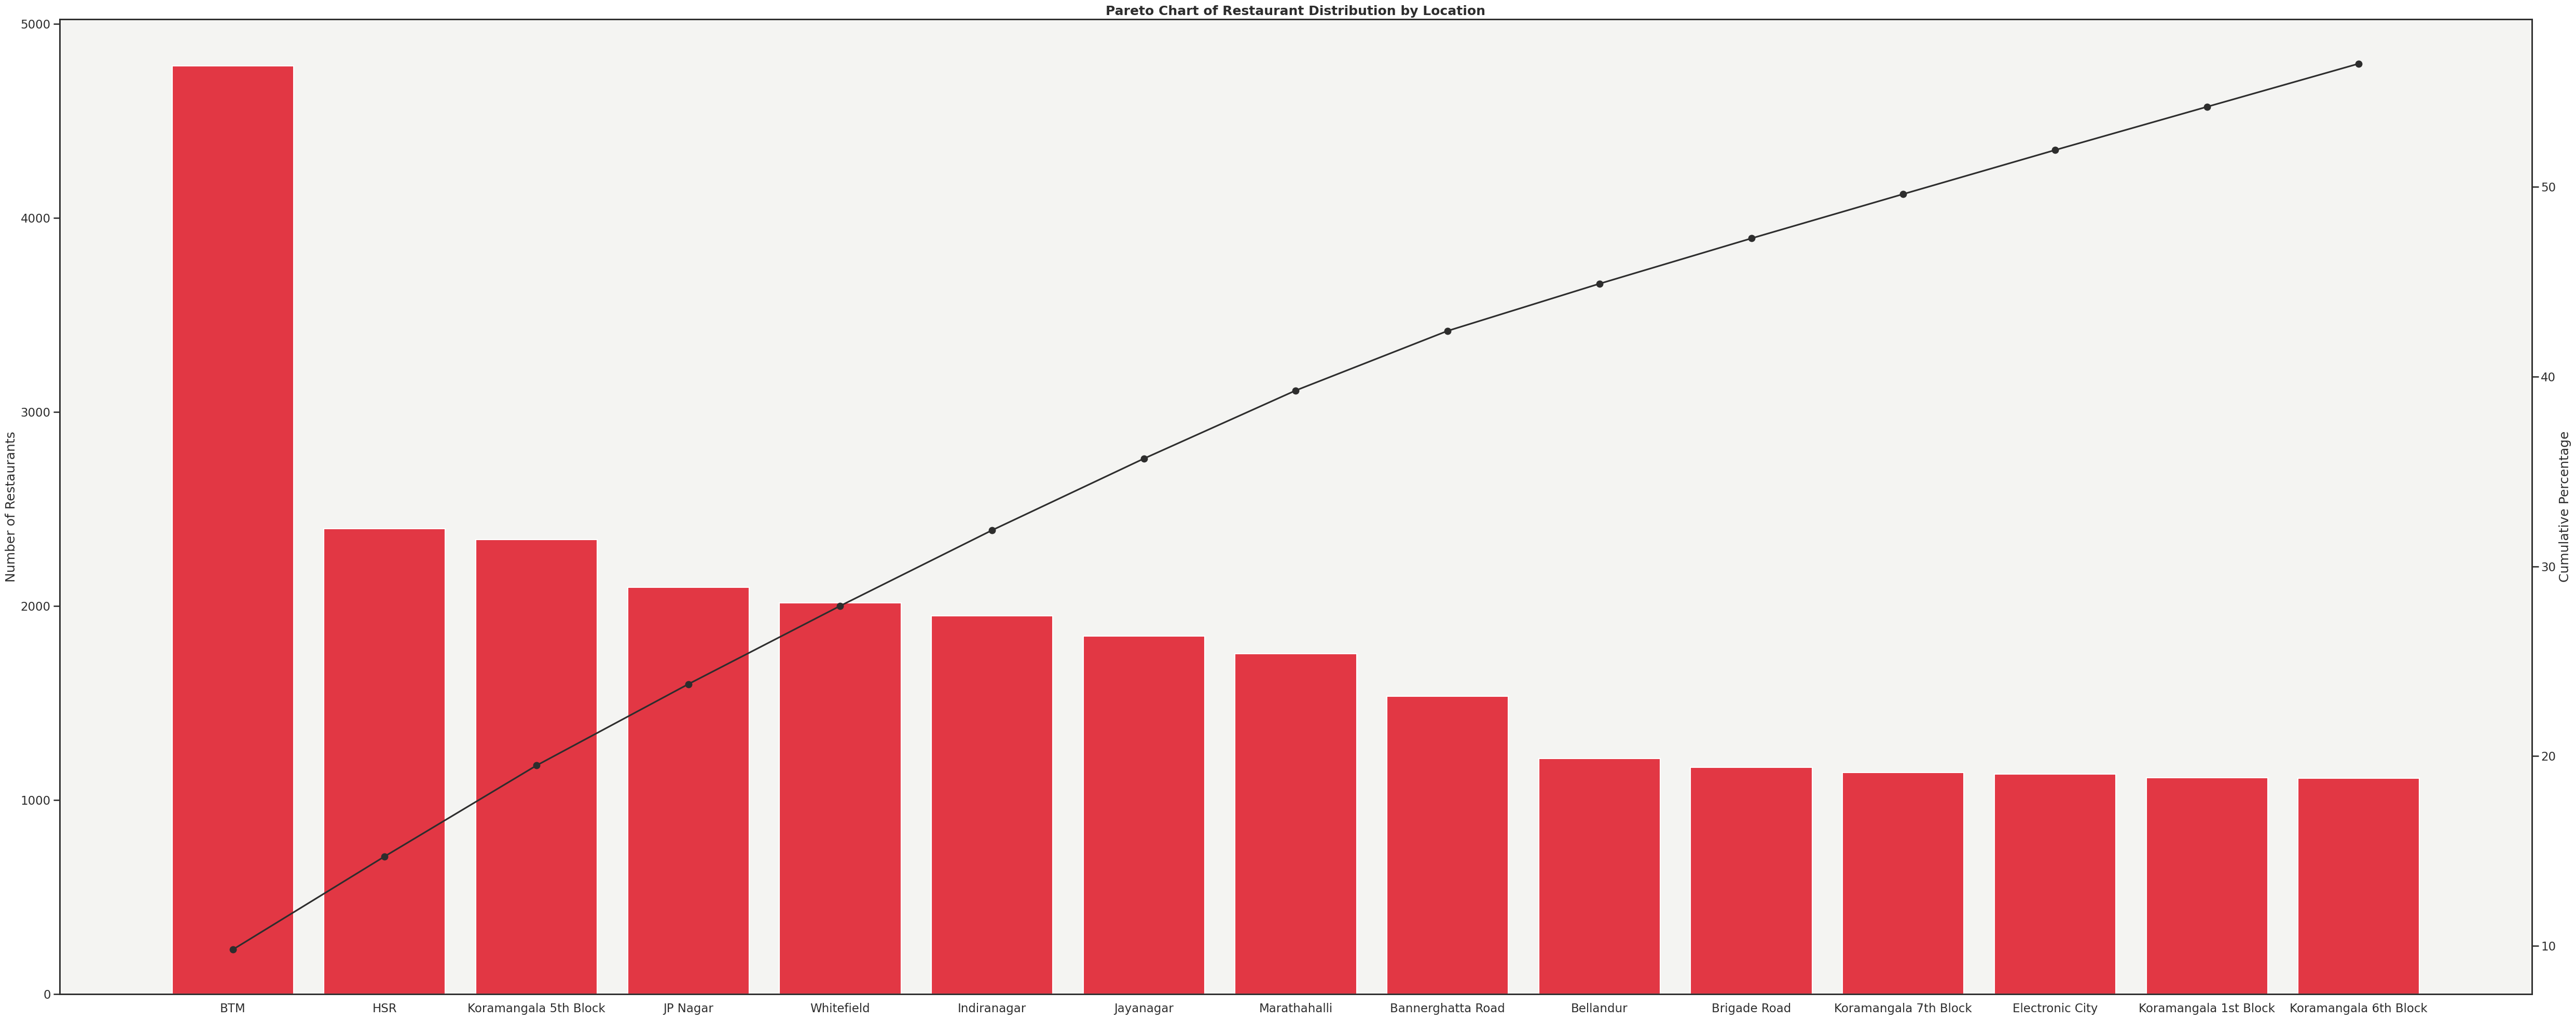

In [41]:
loc_counts = df['location'].value_counts()
cum_perc = loc_counts.cumsum() / loc_counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(50,20))
ax1.bar(loc_counts.index[:15], loc_counts.values[:15], color=CRANBERRY)
ax1.set_ylabel("Number of Restaurants")
ax1.grid(False)
ax2 = ax1.twinx()
ax2.plot(loc_counts.index[:15], cum_perc.values[:15], color=PEPPERCORN, marker='o')
ax2.set_ylabel("Cumulative Percentage")

plt.title("Pareto Chart of Restaurant Distribution by Location")
plt.xticks(rotation=45, ha='right', fontsize= 32)
plt.grid(False)
plt.tight_layout()
plt.show()

A **strong concentration of restaurants in a few key locations** is depicted in this Pareto chart. Major food hubs are indicated by **BTM alone dominating** the distribution, followed by **Koramangala (5th Block), HSR, and JP Nagar**. A small subset of locations accounts for a disproportionate share of restaurants, while the remaining areas contribute incrementally, according to the cumulative curve, which rises sharply early. This is indicative of traditional **80/20 behavior**, in which demand, competition, and operational focus are concentrated in desirable areas rather than dispersed equally throughout the city.

To drive higher customer engagement (votes), Zomato should target expansion or deeper partnerships in premium-rating areas like Lavelle Road. While these areas may have lower density than "mass-market" hubs, their higher rating profile suggests a more satisfied and potentially higher-spending loyal customer base, which aligns with your goal of identifying "partnerships and promotional strategies".

**Customer Engagement**

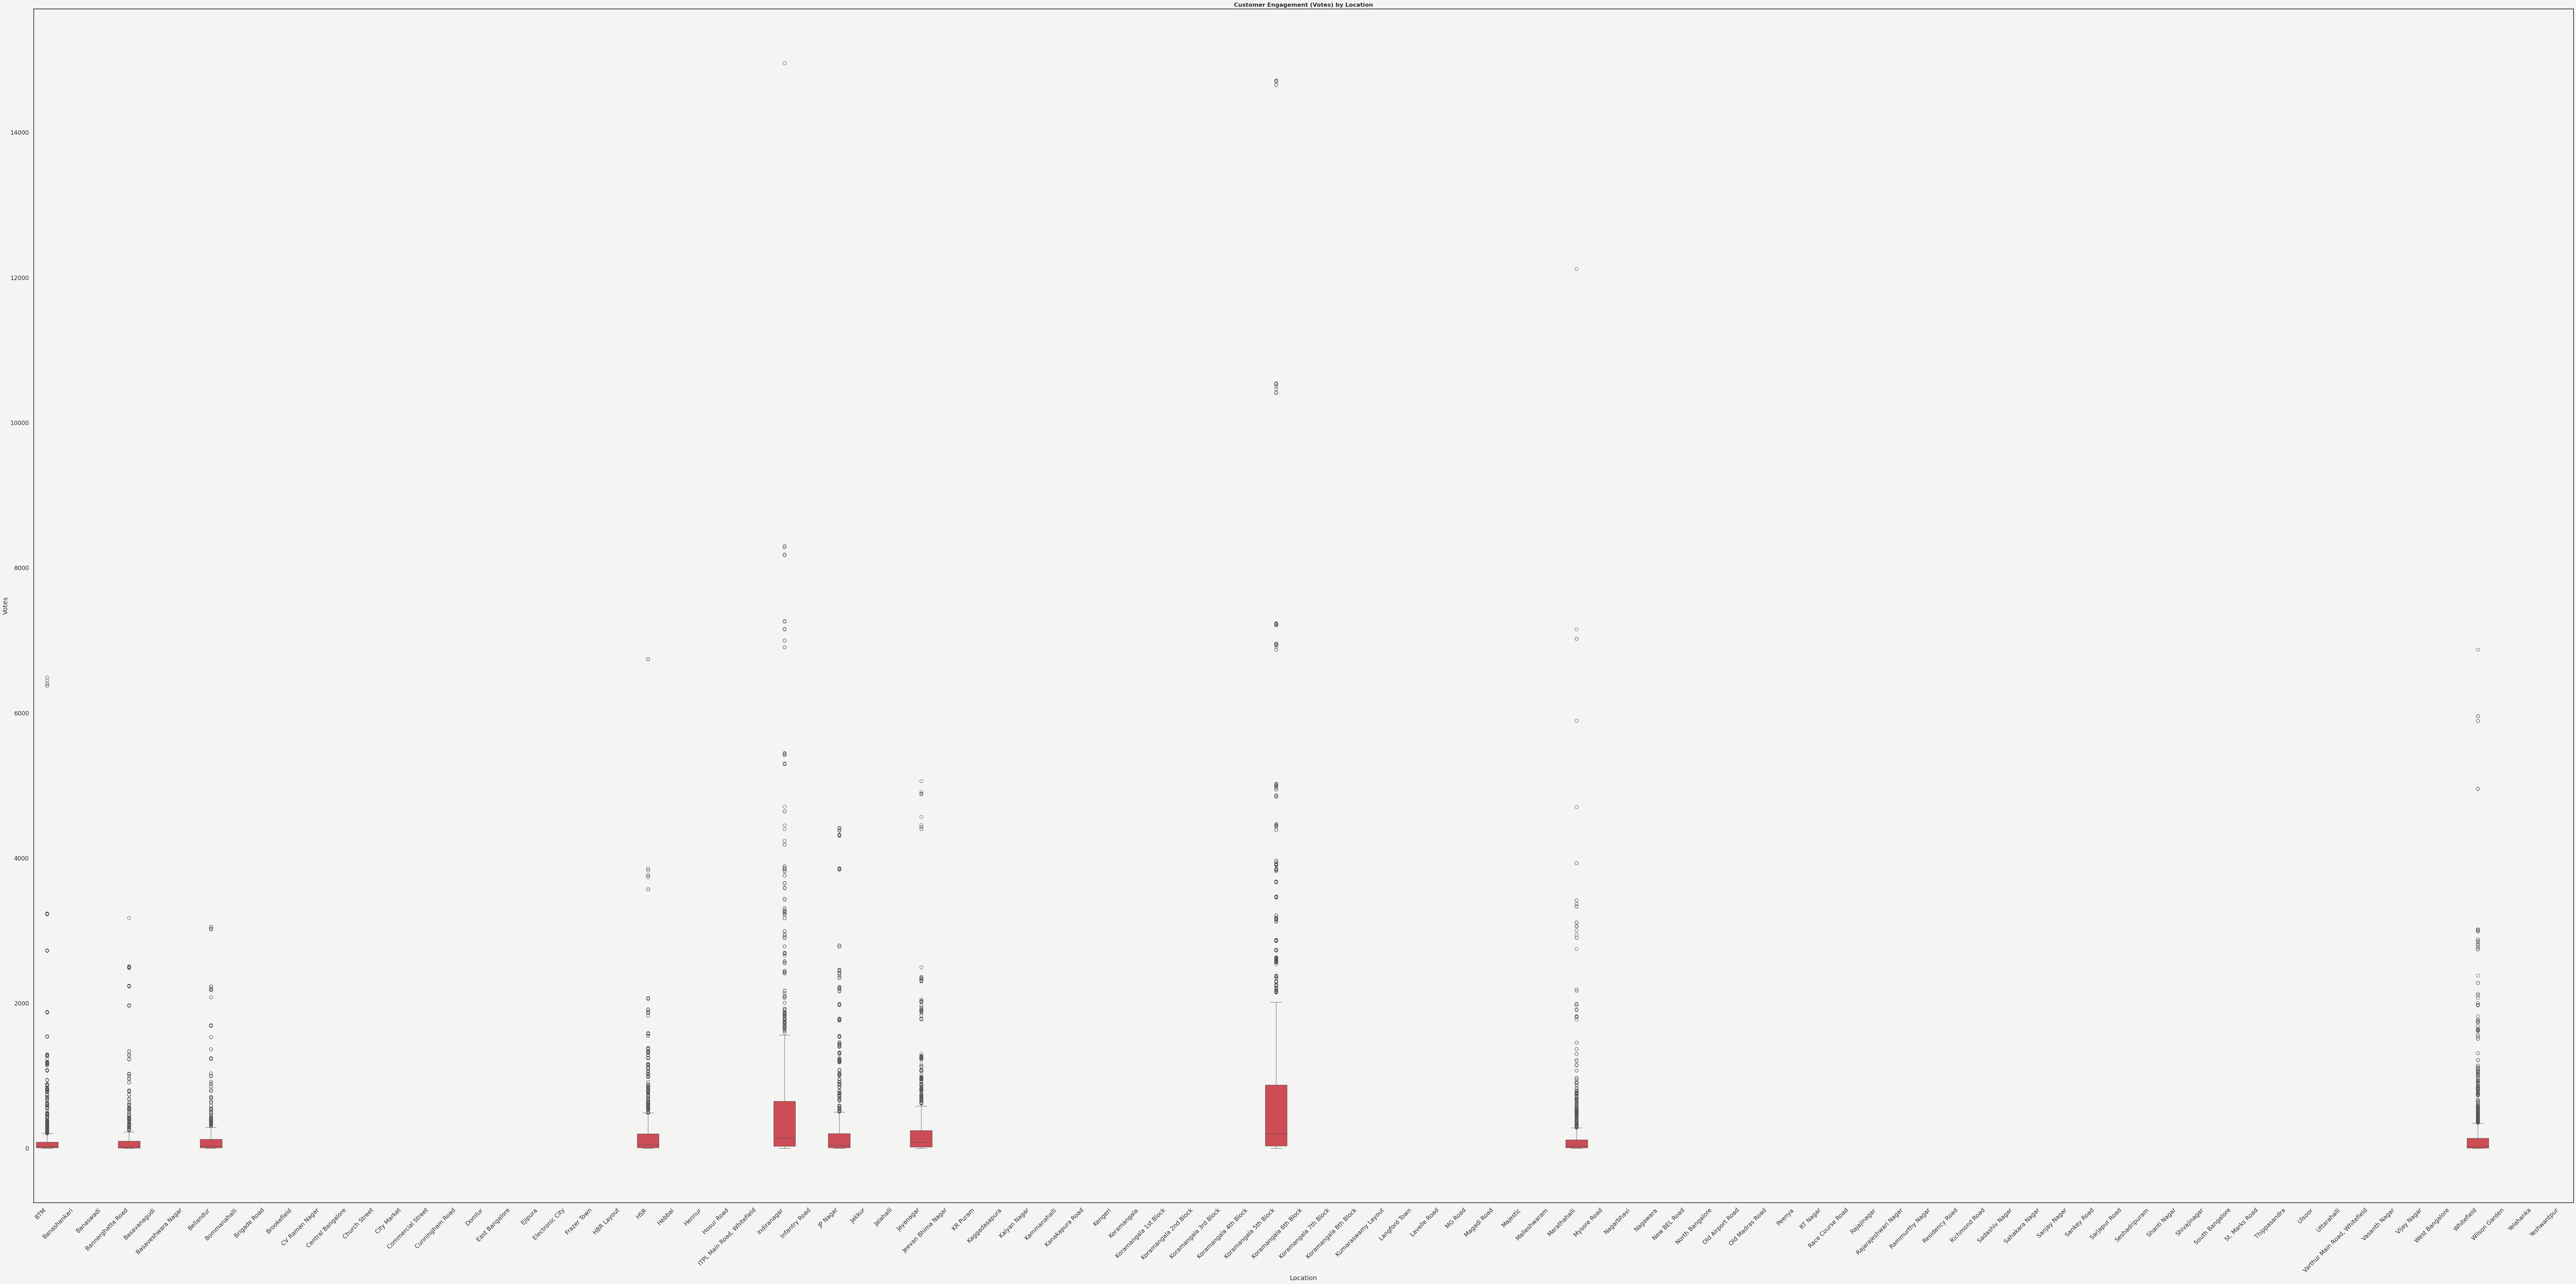

In [32]:
top_vote_locations = df['location'].value_counts().head(10).index
vote_df = df[df['location'].isin(top_vote_locations)]

plt.figure(figsize=(100,50), facecolor=TYROLEAN)
sns.boxplot(
    x='location',
    y='votes',
    data=vote_df,
    color=CRANBERRY
)

plt.title("Customer Engagement (Votes) by Location", fontsize=16, fontweight='bold')
plt.xlabel("Location")
plt.ylabel("Votes")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()


Customer engagement varies significantly across locations. While high-density areas attract more restaurants, some locations show higher vote distributions per restaurant, indicating stronger customer interaction and demand despite having fewer outlets.

**Customer Preference & Demand Analysis**

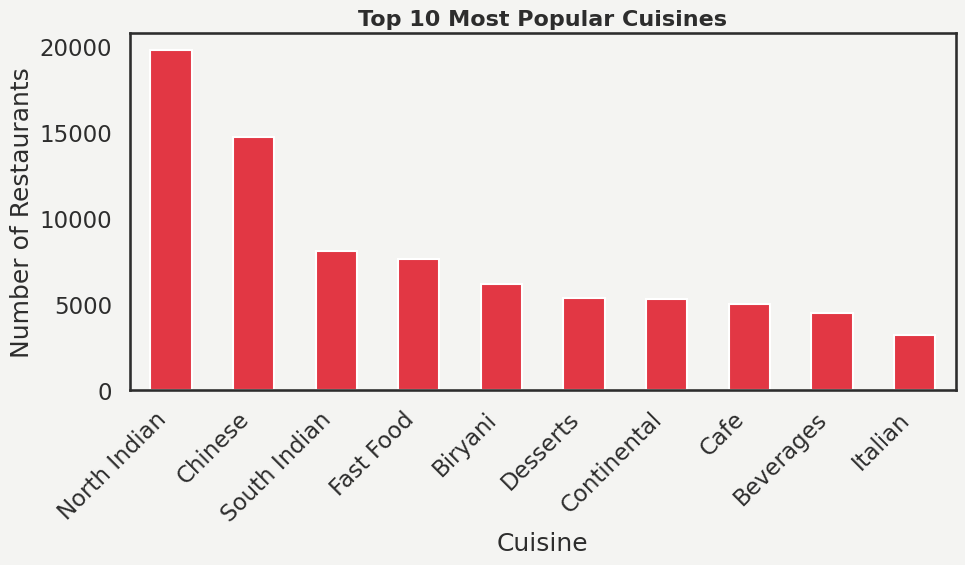

In [33]:
cuisine_series = df['cuisines'].dropna().str.split(', ')
all_cuisines = cuisine_series.explode()

top_cuisines = all_cuisines.value_counts().head(10)

plt.figure(figsize=(10,6), facecolor=TYROLEAN)
top_cuisines.plot(kind='bar', color=CRANBERRY, edgecolor=FETA)

plt.title("Top 10 Most Popular Cuisines", fontsize=16, fontweight='bold')
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()


The graph displays a **highly skewed cuisine popularity**, with **North Indian and Chinese** accounting for a significant portion of restaurants, suggesting widespread acceptance and mass market demand. Fast food and South Indian food make up a robust second tier that reflects regular consumption habits. On the other hand, **Biryani, Desserts, Continental, Café, Beverages, and Italian** lag considerably, indicating a more specialized positioning or selective demand. All things considered, the market is highly concentrated around staple foods, with long-tail diversity as opposed to uniformly distributed popularity.

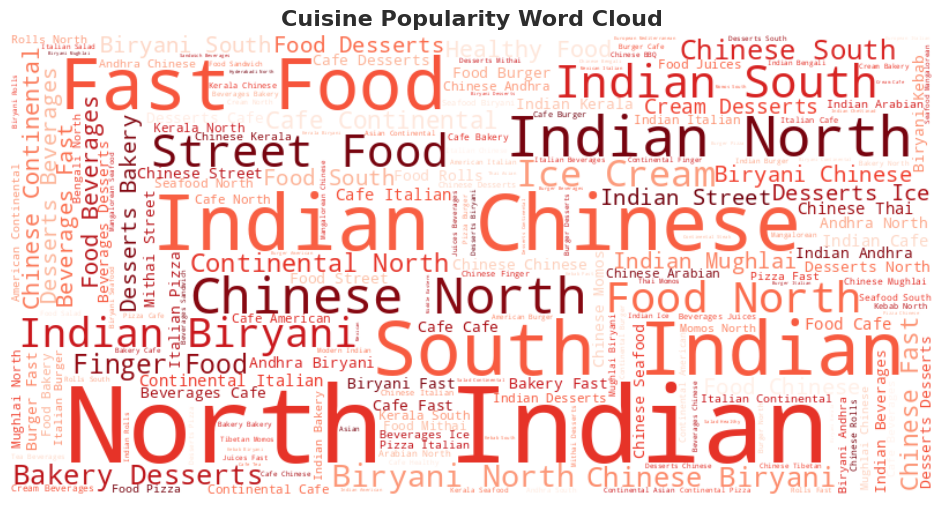

In [34]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color=FETA,
    colormap='Reds'
).generate(' '.join(all_cuisines))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Cuisine Popularity Word Cloud", fontsize=16, fontweight='bold')
plt.show()


**Take a look at the word cloud**, and you get a quick sense of what’s going on in Bangalore’s food scene. The bigger and bolder a word, the more popular that cuisine is on Zomato. North Indian, Chinese, and South Indian jump right out—they’re everywhere, really, and they’ve become the go-to choices for most people in the city. You can tell folks crave those flavors. Then you spot words like Fast Food, Beverages, and Desserts—these aren’t quite as dominant, but they’re still huge. Clearly, people love grabbing something quick or sweet on the move. And if you look closer, you’ll find smaller names like Italian, Continental, or Thai tucked around the edges. They’re not as common, but they add a nice mix to the market, showing that there’s plenty of room for more niche tastes too.

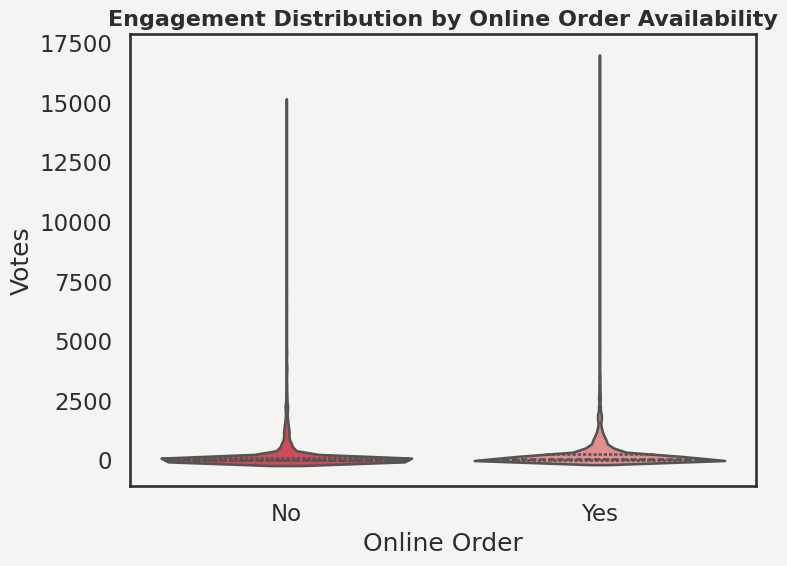

In [46]:
plt.figure(figsize=(8,6), facecolor=TYROLEAN)
sns.violinplot(
    x='online_order',
    y='votes',
    hue='online_order',
    data=df,
    palette=[CRANBERRY, "#F08080"],
    inner='quartile',
    legend=False
)

plt.title("Engagement Distribution by Online Order Availability", fontsize=16, fontweight='bold')
plt.xlabel("Online Order")
plt.ylabel("Votes")
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(False)
plt.tight_layout()
plt.show()

Restaurants that offer online ordering pull in way more customer engagement. You can see it in the jump in total votes—they get a lot more than places that stick to dine-in only. The ratings? Those don’t really change much. Both types of restaurants sit at about the same average rating, so online ordering doesn’t seem to sway that. What really stands out is the spike in activity. Delivery options let restaurants reach a bigger, more price-sensitive crowd. Plus, these spots usually keep the average cost per plate lower—around ₹462, compared to ₹533 at dine-in-only places. That makes them an easy pick for people who order often, which keeps the digital buzz going.

So, sure, dine-in restaurants might get more of those high-quality, “special night out” votes. But online ordering keeps the momentum going and makes a huge difference in how visible and active these restaurants stay on the platform. It’s the engine behind steady, volume-driven engagement.

**Pricing Strategy & Affordability**

1. Price distribution of restaurants.

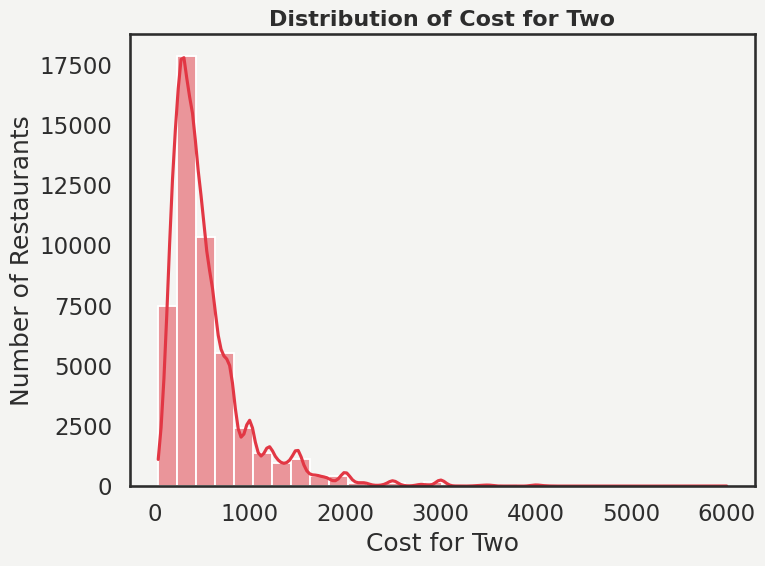

In [36]:
plt.figure(figsize=(8,6), facecolor=TYROLEAN)

sns.histplot(
    df['cost_for_two'],
    kde=True,
    color=CRANBERRY,
    bins=30
)

plt.title("Distribution of Cost for Two", fontsize=16, fontweight='bold')
plt.xlabel("Cost for Two")
plt.ylabel("Number of Restaurants")
plt.grid(False)
plt.tight_layout()
plt.show()

Most restaurants stick to lower prices—usually about ₹300 to ₹400 for two people. You see tons of places in that range. It’s all about making things affordable and pulling in more customers. Sure, you’ll find some fancy or luxury spots, but honestly, they’re rare. The majority just go for the Quick Service or Casual Dining route because people are pretty sensitive to price, and that’s where the big crowd is.

2. Price varying by restaurant type.

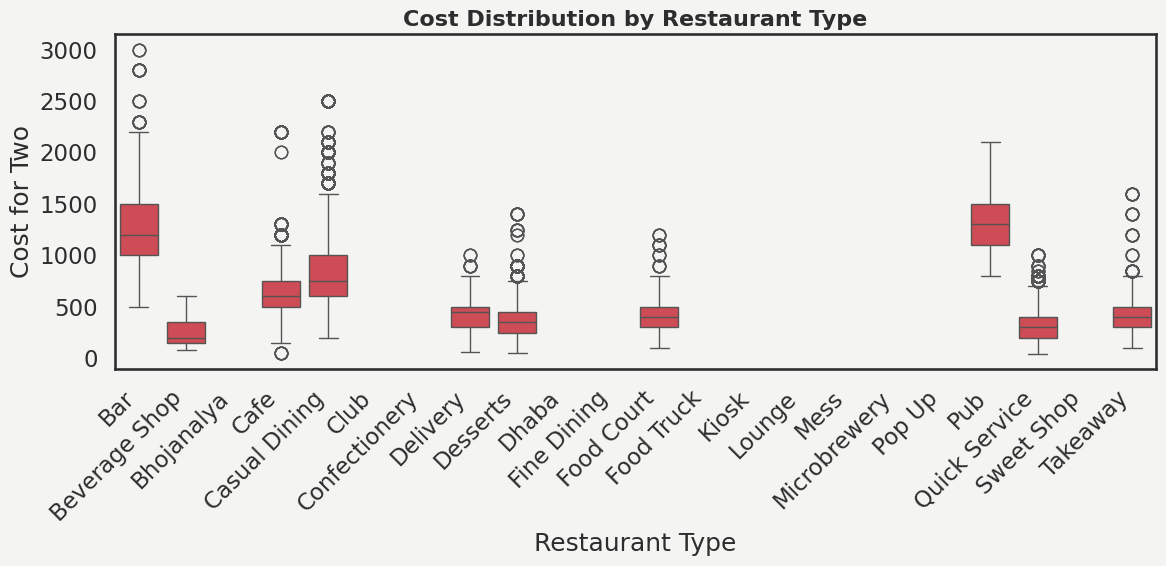

In [37]:
top_types = df['rest_type'].value_counts().head(10).index
cost_df = df[df['rest_type'].isin(top_types)]

plt.figure(figsize=(12,6), facecolor=TYROLEAN)

sns.boxplot(
    x='rest_type',
    y='cost_for_two',
    data=cost_df,
    color=CRANBERRY
)

plt.title("Cost Distribution by Restaurant Type", fontsize=16, fontweight='bold')
plt.xlabel("Restaurant Type")
plt.ylabel("Cost for Two")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()

There is evident market segmentation as pricing varies **substantially across restaurant types**. With numerous high-end outliers, **Bars, Pubs, Clubs, and Fine Dining** have the highest median costs and the widest spreads, indicating premium positioning and a variety of pricing strategies. With moderate variability and a mid-to-high range, **Casual Dining** reflects a wider appeal. On the other hand, **Quick Service, Takeaway, Sweet Shops, Beverage Shops, and Dhaba** exhibit standardized, affordability-driven pricing and are closely grouped at the low-cost end. Overall, the boxplots show that there is significant price differentiation by format, with venues that prioritize experience charging much more than those that prioritize convenience.

**Rating & Customer Satisfaction**

1. Overall rating distribution

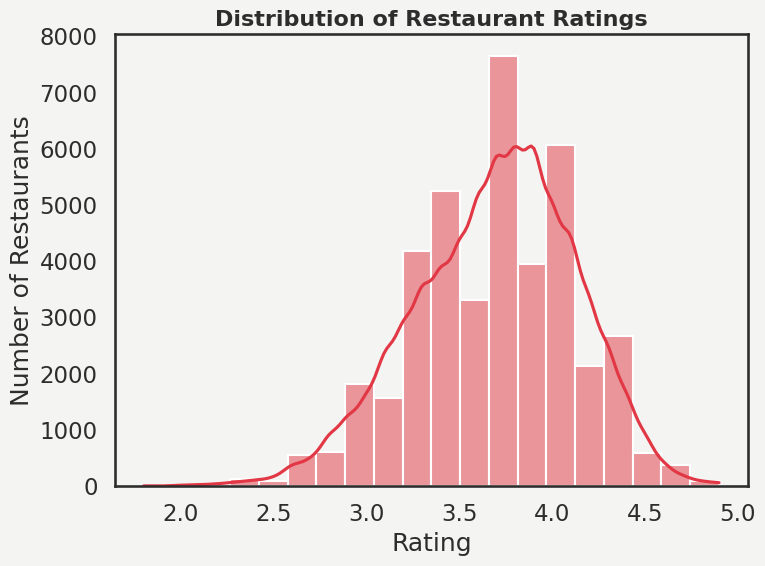

In [38]:
plt.figure(figsize=(8,6), facecolor=TYROLEAN)

sns.histplot(
    df['rate'],
    kde=True,
    color=CRANBERRY,
    bins=20
)

plt.title("Distribution of Restaurant Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.grid(False)
plt.tight_layout()
plt.show()

*The overall rating distribution for the restaurant market typically follows a bell-shaped curve that centers around a mean of 3.9*, indicating a generally positive sentiment where the majority of establishments are considered "good" to order from. This normal distribution reveals that approximately 68% of ratings are clustered within one standard deviation of the peak, highlighting a high level of service consistency across the city's diverse dining landscape. Interestingly, while most restaurants maintain an average score, higher ratings often correlate with the provision of additional services like online ordering and table booking, which significantly boost customer convenience and engagement. **This pattern suggests that the market is mature, with a well-defined standard of quality**, leaving high-end excellence (ratings > 4.5) and significant underperformance (ratings < 2.5) as the rare, statistical outliers.

2. Is there a relationship between votes and ratings?

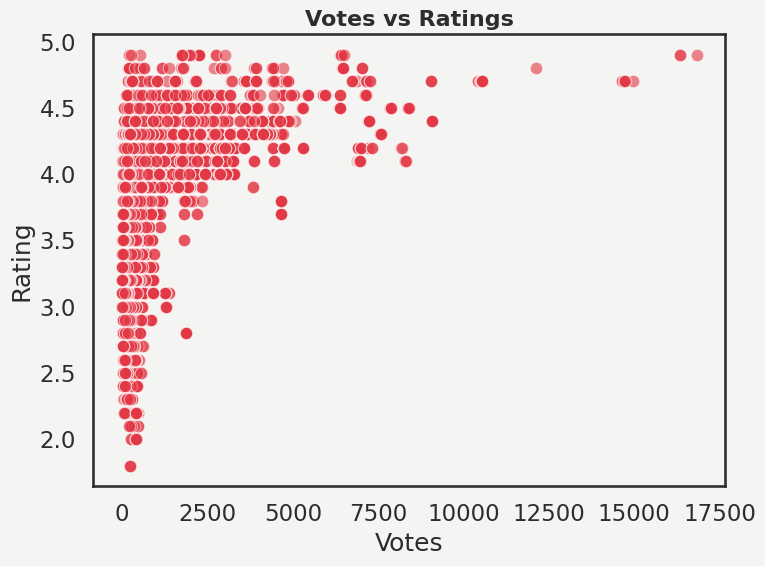

In [39]:
plt.figure(figsize=(8,6), facecolor=TYROLEAN)

sns.scatterplot(
    x='votes',
    y='rate',
    data=df,
    color=CRANBERRY,
    alpha=0.6
)

plt.title("Votes vs Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.grid(False)
plt.tight_layout()
plt.show()

Looking at the scatter plot, you can see a **weak positive link between votes and ratings, but it’s not like you need a certain number of votes to be successful.** There’s this dense patch of restaurants with anywhere from 0 to 2,500 votes, and their ratings are all over the place—some as low as 1.8, others all the way up to 4.9. But once a restaurant gets past 5,000 votes, the story changes. Their ratings settle down and almost never dip below 3.7. So, sure, a place can score high even with just a handful of votes—sometimes that’s just a small group of super fans. But when you see thousands of people weighing in and the rating still holds up, it says something. It means the restaurant isn’t just getting lucky—they’re delivering solid quality over and over, and people keep coming back because of it.

**Competitive Positioning — Value for Money**

Restaurants delivering the best value. Cost vs Rating (Colored by Restaurant Type)

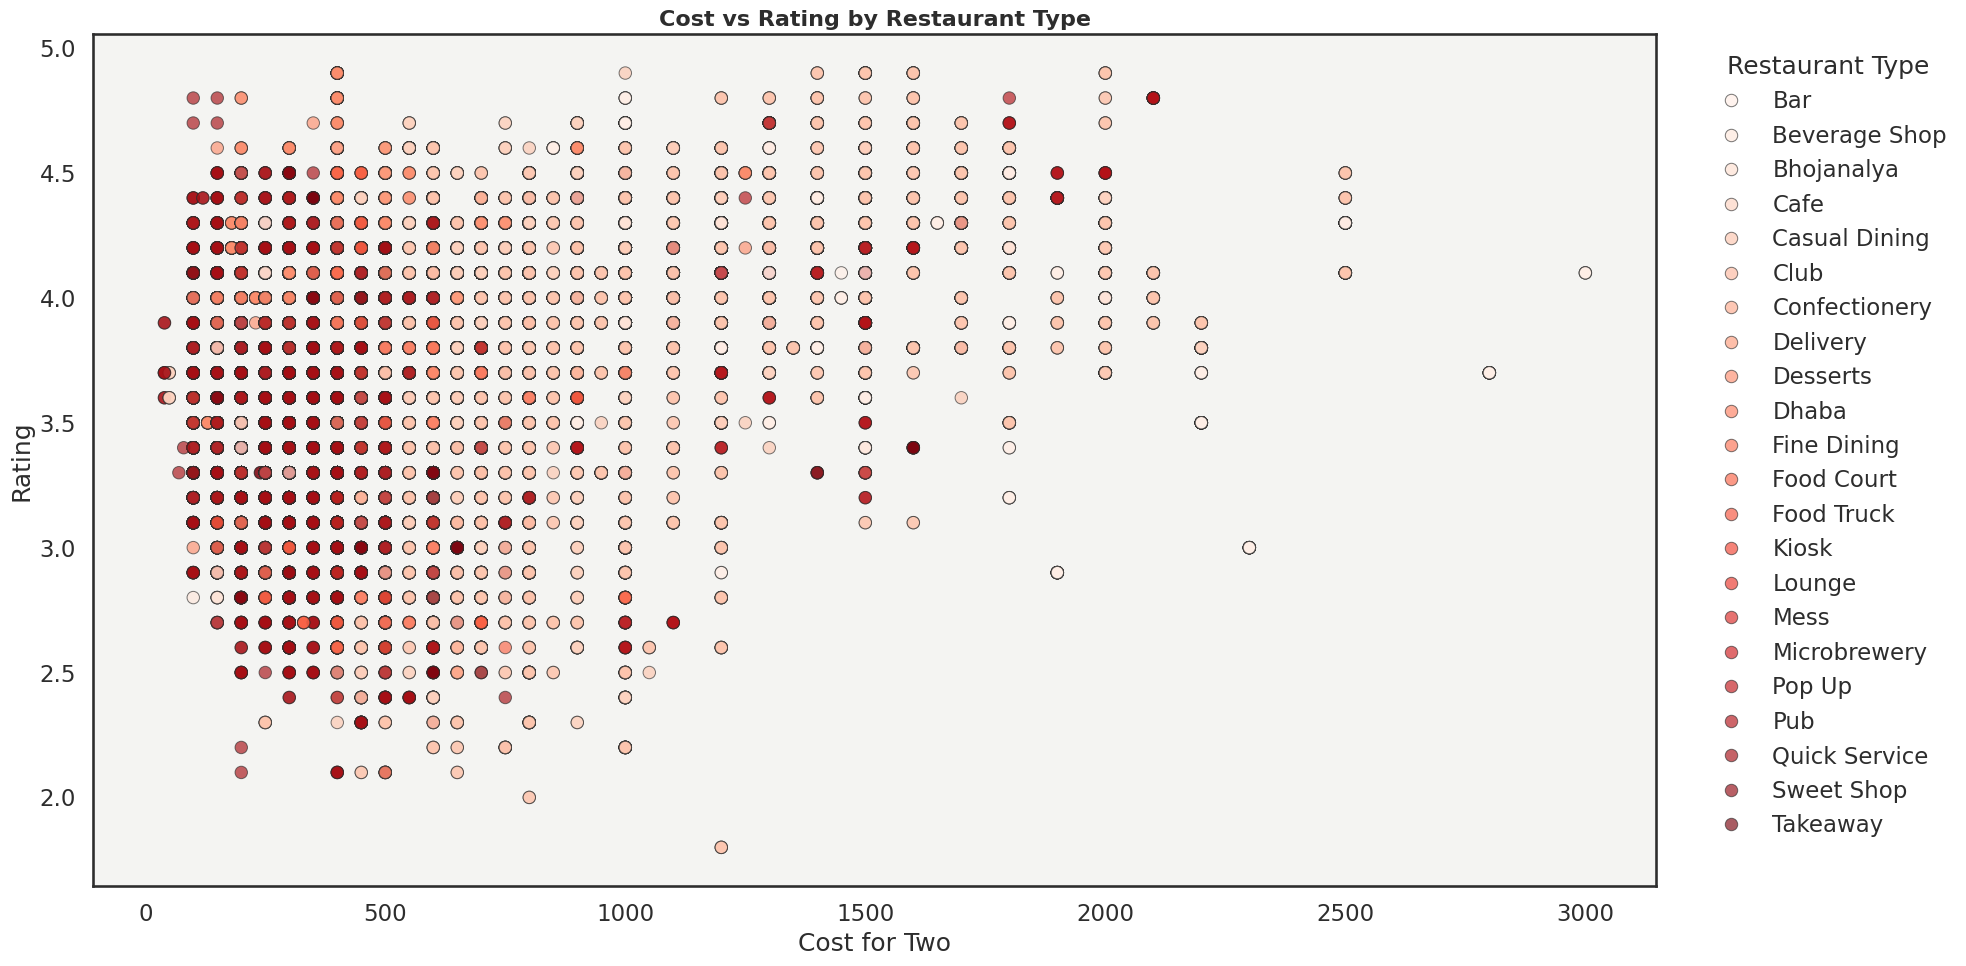

In [40]:
plt.figure(figsize=(20,10))

sns.scatterplot(
    x='cost_for_two',
    y='rate',
    data=cost_df,
    hue='rest_type',
    palette="Reds",
    alpha=0.65,
    edgecolor=PEPPERCORN,
    s=80
)

plt.title(
    "Cost vs Rating by Restaurant Type",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Cost for Two")
plt.ylabel("Rating")

# Legend styling
plt.legend(
    title="Restaurant Type",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)
plt.grid(False)
plt.tight_layout()
plt.show()


**Quick service, takeout, and casual dining offer the best value for the money**. According to the scatter, at low-to-mid costs (₹200–₹600), these types consistently receive ratings of ~3.5–4.2, indicating high customer satisfaction without high spend. On the other hand, cafes and dessert establishments display moderate ratings at inflated prices, while fine dining, clubs, and lounges cluster at significantly higher costs with only slight rating improvements. **Value is maximized overall when ratings are high and expenses are kept low, obviously favoring Quick Service-focused formats.**